## Clasification and Regression Trees from scratch

Here we will build a classic decision tree from scratch

This requires first being able to split data using the GINI index from before:

In [5]:
#First our standard packages
import pandas as pd
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
#lets first create our data from the lecture
G1 = ["Group1"] * 100

In [82]:
G1[0], len(G1)

('Group1', 100)

In [9]:
G2 = ['Group2'] * 100

In [83]:
G2[0], len(G2)

('Group2', 100)

In [14]:
#these are just arays of which group they are in so maybe we should make it a real dataset

In [23]:
X1 = np.array([random.gauss(-5,1) for _ in range(100)])

In [24]:
Y1 = np.array([random.gauss(0,5) for _ in range(100)])

In [25]:
X2 = np.array([random.gauss(5,1) for _ in range(100)])

In [26]:
Y2 = np.array([random.gauss(0,5) for _ in range(100)])

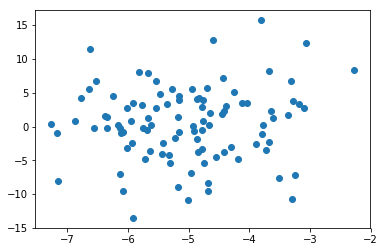

In [27]:
plt.scatter(X1,Y1)

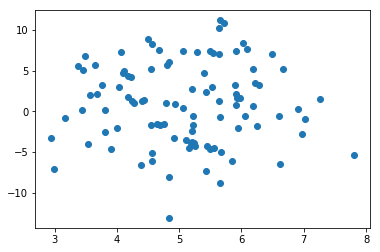

In [37]:
plt.scatter(X2,Y2)

In [28]:
Group1 = pd.DataFrame({'X' : X1, 'Y' : Y1, 'Group' : G1})

In [85]:
Group1.head()

,X,Y,Group
0,-4.560652,5.031129,Group1
1,-5.056226,1.869162,Group1
2,-4.901097,4.658226,Group1
3,-6.727258,-4.607674,Group1
4,-3.602779,1.928465,Group1


In [29]:
Group2 = pd.DataFrame({'X' : X2, 'Y' : Y2, 'Group' : G2})

In [87]:
Group2.head()

,X,Y,Group
0,4.233641,4.194389,Group2
1,5.056342,7.392928,Group2
2,4.434529,1.361793,Group2
3,4.829293,-8.104180,Group2
4,4.379224,-6.523490,Group2


In [30]:
#ok now we have two sets of data we should be able to understand splitting more clearly lets make the one for visualisation
FullDat = pd.concat([Group1,Group2])

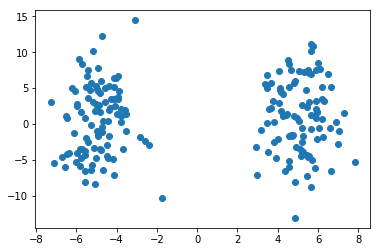

In [95]:
#Here we can see very clearly our different groups with the data
plt.scatter(FullDat['X'],FullDat['Y'])

So we want to put a split at 0 on the X axis to get a perfect split from what we see but how do we go about splitting them and then testing the GINI score?

In [98]:
#While this is redundant as we actually have a split lets do it manually at a point
SplitLeft = FullDat[FullDat['X'] < 0]

In [101]:
SplitLeft.head()

,X,Y,Group
0,-4.560652,5.031129,Group1
1,-5.056226,1.869162,Group1
2,-4.901097,4.658226,Group1
3,-6.727258,-4.607674,Group1
4,-3.602779,1.928465,Group1


In [102]:
SplitRight = FullDat[FullDat['X'] > 0]

In [103]:
SplitRight.head()

,X,Y,Group
0,4.233641,4.194389,Group2
1,5.056342,7.392928,Group2
2,4.434529,1.361793,Group2
3,4.829293,-8.104180,Group2
4,4.379224,-6.523490,Group2


In [131]:
#now we have our split we need to work out the GINI score, which is based on the proportion of correct/total and missclasifications
LeftCounts = SplitLeft['Group'].value_counts().index.tolist(),SplitLeft['Group'].value_counts().tolist()


In [168]:
LeftCounts

[['Group1'], [100]]

In [133]:
RightCounts = SplitRight['Group'].value_counts().index.tolist(),SplitRight['Group'].value_counts().tolist()

In [138]:
RightCounts

(['Group2'], [100])

In [140]:
#Ok now we have our proportions we need to work out our gini which is 1-Sum(proportion^2)
G1PropCorrect = LeftCounts[1][0] / LeftCounts[1][0]
G1PropIncorrect = 0/LeftCounts[1][0] 


In [141]:
G1GINI = 1- (G1PropCorrect**2 + G1PropIncorrect**2)

In [143]:
G1GINI

0.0

In [144]:
G2PropCorrect = RightCounts[1][0] / RightCounts[1][0]
G2PropIncorrect = 0/RightCounts[1][0] 

In [145]:
G2GINI = 1- (G2PropCorrect**2 + G2PropIncorrect**2)

In [146]:
G2GINI

0.0

In [147]:
GINI = G1GINI + G2GINI

In [148]:
GINI

0.0

And there we go we have our GINI score for a split at the X = 0 which is a perfect split however that was a long winded way to do it so lets build two functions, one that calculates the GINI score and one that finds the best split

In [1]:
#this function will calculate the GINI score it takes the two sides of the split and the name of the classifier column it is a quick and dirtyu way to do it for qny number of groupsgroups
def Calc_gini(Left,Right,Class):
    
    LeftCounts = np.array(Left[Class].value_counts().tolist())
    LeftProps = LeftCounts / sum(LeftCounts)
    
    RightCounts = np.array(Right[Class].value_counts().tolist())
    RightProps = RightCounts /sum(RightCounts)
    
    GiniLeft = 1-sum(LeftProps**2)
    GiniRight = 1-sum(RightProps**2)
    
    return GiniLeft + GiniRight

In [189]:
Calc_gini(SplitLeft,SplitRight,"Group")

0.0

In [2]:
#now we will just create a quick function that splits a dataframe
def Create_split(Data,Column,SplitPoint):
    SplitLeft = Data[Data[Column] < SplitPoint]
    SplitRight = Data[Data[Column] > SplitPoint]
    return SplitLeft, SplitRight

In [458]:
Left,Right = Create_split(FullDat,'X',0)

In [459]:
Left.head()

,X,Y,Group
0,-5.667395,13.440209,Group1
1,-3.960367,-0.818132,Group1
2,-3.608026,10.582247,Group1
3,-6.370921,0.010674,Group1
4,-4.910664,-4.140190,Group1


In [3]:
#now the overall function that will find the best split.
def find_split(Data,Column,Class):
    #first things first set a best score to be 1 and an empty best split
    BestScore = 1
    BestSplit = []
    #next we will loop through all values of the data and calculate the gini score for each split
    for i in range(0,len(Data[Column])):
        Left,Right = Create_split(Data,Column,Data.iloc[i][Column])
        CurrentGini = Calc_gini(Left,Right,Class)
        #if our current score is better than the current best replace it and set that value to be the split point.
        if CurrentGini < BestScore:
            BestScore = CurrentGini
            BestSplit = Data.iloc[i][Column]
            index = i
    #we're going to return an output with the location of the split, the value split on and the split datasets
    return {'Index' : index,'Value' : BestSplit , 'Sets' :  Create_split(Data,Column,BestSplit)}
    

In [33]:
TestSplit = find_split(FullDat,'X','Group')

In [34]:
TestSplit['Value']

-2.2676033774176982

Right so we have built a function that given input data will find the best split point. This is the fundemental part of the algorithm now we just have to write the functions that will build the tree itself. This is in fact phenominally complicated and much harder than simply doing the maths as it is algorithmically difficult to explore the tree in the correct order. Try and get your head around how the following function navigates the tree.

Remember that a tree needs to explore left first:

                    Root
                    
         L(1)(3)(5)         R(6)(8)
         
     L(2)         R(4)   L(7)      R(9)
     
The number is the order you visit them in so go left where possible and then right when left is not possible and back up the tree.

In [10]:
#lets make some messier data to play around with. we've created 3 variables here so we can do classification on multiple features
X1 = np.array([random.gauss(-2,2) for _ in range(100)])
X2 = np.array([random.gauss(2,2) for _ in range(100)])
Y1 = np.array([random.gauss(1,1) for _ in range(100)])
Y2 = np.array([random.gauss(-1,1) for _ in range(100)])
Z1 = np.array([random.gauss(4,3) for _ in range(100)])
Z2 = np.array([random.gauss(6,2) for _ in range(100)])

In [11]:
Group1 = pd.DataFrame({'X' : X1, 'Y' : Y1, 'Z' : Z1, 'Group' : G1})
Group2 = pd.DataFrame({'X' : X2, 'Y' : Y2, 'Z' : Z2 , 'Group' : G2})
FullDat = pd.concat([Group1,Group2])

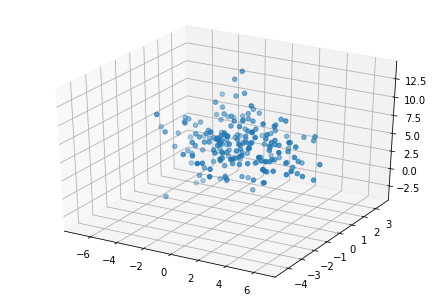

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(FullDat['X'],FullDat['Y'],FullDat['Z'])
plt.show()

In [13]:
#First we will create a simple function that will save a terminal node it simply takes the split data and finds the most common classification and says that is the prediction
def to_terminal(Set,Class):
	return Set[Class].value_counts().idxmax()
 

In [574]:
to_terminal(Left,'Group')

'Group1'

In [38]:
#This function is the heart and soul of the decision tree creation algorithm, This is a recursive function - which means it calls itself as you can see where it calls split()

#The function takes a node - the output from find_split(), a maximum depth, minimum size of the data and a starting depth
def split(node,Column,Class, max_depth, min_size, depth):
    #here we extract the two datasets from our split
    left, right = node['Sets']
    #we then delete the node sets so we can reassign it later
    del(node['Sets'])
    # check for a no split by making sure left and right actually exist
    if len(left) < 1 or len(right) < 1:
        node['left'] = node['right'] = to_terminal(left + right,Class)
        return
    
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left,Class), to_terminal(right,Class)
        return
 
	# process left child
    #First check that there is enough data if there isn't terminal it if there is keep splitting
    if len(left) <= min_size:
        node['left'] = to_terminal(left,Class)
    else:
        node['left'] = find_split(left,Column,Class)
        #this is the recursive part each node that isn't made terminal then splits again and again and again until it is terminal
        split(node['left'],Column,Class, max_depth, min_size, depth+1)
        
	# process right child
    #First check that there is enough data if there isn't terminal it if there is keep splitting
    if len(right) <= min_size:
        node['right'] = to_terminal(right,Class)
    else:
        node['right'] = find_split(right,Column,Class)
        split(node['right'],Column,Class, max_depth, min_size, depth+1)

In [15]:
#and our final function is very simple it simply creates the initial root and then runs the split function on that.
def Build_tree(Data, Column, Class,max_depth, min_size):
	root = find_split(Data,Column,Class)
	split(root,Column,Class, max_depth, min_size, 1)
	return root

In [39]:
Tree = Build_tree(FullDat,'X','Group',5,10)

In [40]:
Tree

{'Index': 49,
 'Value': -2.2676033774176982,
 'left': {'Index': 0,
  'Value': -3.8982335378530766,
  'left': {'Index': 0,
   'Value': -6.339852665444326,
   'left': 'Group1',
   'right': {'Index': 0,
    'Value': -6.252189815416116,
    'left': 'Group1',
    'right': {'Index': 0,
     'Value': -5.331098978374443,
     'left': 'Group1',
     'right': 'Group1'}}},
  'right': {'Index': 0,
   'Value': -3.1792309620575674,
   'left': {'Index': 0,
    'Value': -3.6723453840898683,
    'left': 'Group1',
    'right': 'Group1'},
   'right': 'Group1'}},
 'right': {'Index': 0,
  'Value': 3.3909238142137643,
  'left': 'Group2',
  'right': {'Index': 0,
   'Value': 4.9745219672423575,
   'left': {'Index': 0,
    'Value': 4.359042277820434,
    'left': {'Index': 0,
     'Value': 4.09773334912968,
     'left': 'Group2',
     'right': 'Group2'},
    'right': {'Index': 0,
     'Value': 4.657557215721096,
     'left': 'Group2',
     'right': 'Group2'}},
   'right': {'Index': 0,
    'Value': 6.42360626844

Well that is apparently our tree although in that form it is a little bit hard to read so lets create a new function that prints the tree nicely

In [568]:
#Don't worry too much about how this is made it is just there to help us visualise this
def print_tree(node, depth=0):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['Index']+1), node['Value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

In [577]:
print_tree(Tree)

[X163 < 0.811]
 [X154 < -5.103]
  [Group2]
  [Group1]
 [X1 < 5.463]
  [Group2]
  [Group2]


What this means is that we have our first split point at 0.811 and then the left of that is split at -5.103 which splits into two terminal nodes the left which predicts data ending here be in group 2 and the right which predicts group one.
    
The right hand side has a split at 5.463 and then both terminal nodes predict group 2

So now we have an algorithm that builds a tree we need to make some predictions and see how good our tree is.
    

In [589]:
#this is a function that takes a single row of data and following the tree predicts which group it should be in, it is another recursive function
def Predict(Tree,Data):
    #it first checks to see whether the data provided is bigger or smaller than the intial split
    if Data < Tree['Value']:
        #this checks to see if there is a child node isinstance checks to see if there is a dictionary called Tree left if there is it runs the whole thing again on it if not it returns the preciction
        if isinstance(Tree['left'], dict):
            return Predict(Tree['left'], Data)
        else:
            return Tree['left']
    else:
        if isinstance(Tree['right'], dict):
            return Predict(Tree['right'], Data)
        else:
            return Tree['right']

In [587]:
Predict(Tree, 0.1)

'Group1'

In [588]:
Predict(Tree, 2)

'Group2'

Lets create some more fake data under the same parameters to trial our tree on

In [590]:
TestX1 = np.array([random.gauss(-2,2) for _ in range(100)])
TestX2 = np.array([random.gauss(2,2) for _ in range(100)])
TestY1 = np.array([random.gauss(1,1) for _ in range(100)])
TestY2 = np.array([random.gauss(-1,1) for _ in range(100)])
TestZ1 = np.array([random.gauss(4,3) for _ in range(100)])
TestZ2 = np.array([random.gauss(6,2) for _ in range(100)])

In [591]:
TestGroup1 = pd.DataFrame({'X' : TestX1, 'Y' : TestY1, 'Group' : G1})
TestGroup2 = pd.DataFrame({'X' : TestX2, 'Y' : TestY2, 'Group' : G2})
TestData = pd.concat([TestGroup1,TestGroup2])

In [592]:
TestData.head()

,X,Y,Group
0,-0.924738,1.586017,Group1
1,-2.171178,1.347661,Group1
2,-1.356510,2.252986,Group1
3,-0.916785,2.833189,Group1
4,-2.855094,2.273343,Group1


In [598]:
#now we have our testing data lets run the predict function over it
#we'll initialise an empty vector and then append to it the prediction for each row
Predictions = []
for i in range(0,len(TestData)):
    Predictions.append(Predict(Tree,TestData.iloc[i]['X']))

In [605]:
Predictions[1:5]

['Group1', 'Group1', 'Group1', 'Group1']

In [601]:
#lets work out how accurate our predictions were
Incorrect = 0
for i in range(0,len(Predictions)):
    if Predictions[i] != TestData.iloc[i]['Group']:
        Incorrect +=1

In [602]:
Incorrect

46

In [609]:
((len(Predictions) - Incorrect)/len(Predictions))*100

77.0

## Task

So our model predicts at a 77% accuracy which is pretty good considering it is working on made up data. The next step is to mess around with the hyperparameters, try out different tree depths etc and see if you can improve prediction accuracy. There are also other features to build trees on. Make a tree for Y and a tree for Z and then you need to run the prediction on all 3 and the most common prediction is the one you go with.

## Task 2

Inside the practical folders is the dataset abalone. This is a classified dataset of Shellfish with various features of their morphology and then what sex they are. Build a decision tree that allows you to predict what sex an individual is.

In [3]:
Abalone = pd.read_csv('Abalone.csv')

In [4]:
Abalone.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
